<a href="https://www.kaggle.com/code/danuherath/spam-email-classification?scriptVersionId=201505785" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<h1 align="center"> Spam Email Filtering (Binary Classification) </h1>

<img 
    src="https://storage.googleapis.com/kaggle-datasets-images/3491546/6096073/ea593de1f2c55069bc73a3c50aea596d/dataset-cover.jpg?t=2023-07-07-16-37-33"
    alt="" 
    width="400" 
    height="300" 
    style="display: block; margin: 0 auto; border-radius:15px" 
/>

---

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re

from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



In [17]:
data = pd.read_csv('/kaggle/input/spam-filter/emails.csv')
data.head()


,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [18]:
data.shape


(5728, 2)

---
# Data Visualization
---

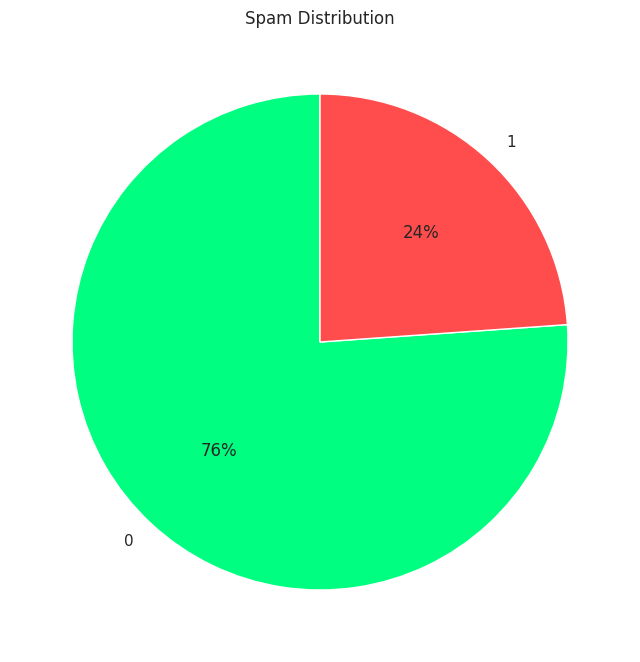

In [19]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 10))

spam_counts = data.spam.value_counts()

colors = ['#00ff80', '#ff4d4d']
plt.pie(spam_counts, labels=spam_counts.index, autopct='%1.0f%%', startangle=90, colors=colors)
plt.title('Spam Distribution')
plt.show()


In [20]:
stop = stopwords.words('english')

data['text_sans_stopwords'] = data['text'].apply(lambda x: ' '.join([item for item in x.split() if item.lower() not in stop]))


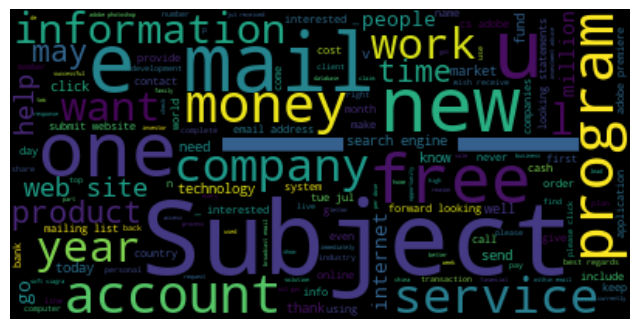

In [21]:
data_spam = data[data["spam"] == 1]

plt.figure(figsize=(8, 10))
text = ' '.join(data_spam['text_sans_stopwords'])
wordcloud2 = WordCloud().generate(text)

plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis("off")
plt.show()


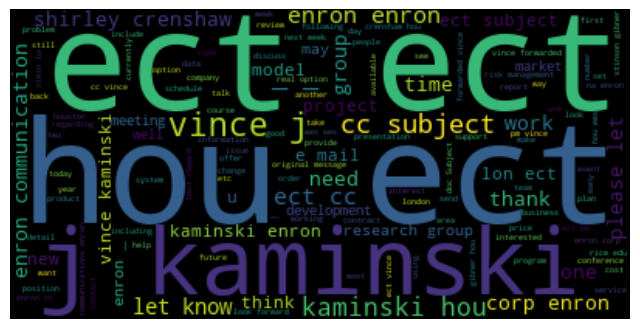

In [22]:
data_spam = data[data["spam"] == 0]

plt.figure(figsize=(8, 10))
text = ' '.join(data_spam['text_sans_stopwords'])
wordcloud2 = WordCloud().generate(text)

plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis("off")
plt.show()


---
# Data cleaning
---

In [23]:
X = data["text"]
y = data["spam"]


In [24]:
def clean_text(doc):
    document = re.sub('[^a-zA-Z]', ' ', doc)
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    document = re.sub(r'\s+', ' ', document)
    return document


In [25]:
X_sentences = []
reviews = list(X)
for rev in reviews:
    X_sentences.append(clean_text(rev))


In [26]:
vectorizer = TfidfVectorizer(max_features=2500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X= vectorizer.fit_transform(X_sentences).toarray()


---
# Model Training
---

In [27]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=1)


In [28]:
NB_model = MultinomialNB()
NB_model.fit(X_train, y_train)


MultinomialNB()

In [29]:
y_pred = NB_model.predict(X_val)


In [30]:
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))
print(accuracy_score(y_val, y_pred))


[[870   6]
 [ 10 260]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       876
           1       0.98      0.96      0.97       270

    accuracy                           0.99      1146
   macro avg       0.98      0.98      0.98      1146
weighted avg       0.99      0.99      0.99      1146

0.9860383944153578
